import all necessary items

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download(['vader_lexicon'])

[nltk_data] Downloading package vader_lexicon to C:\Users\Tim
[nltk_data]     Kraemer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Import all dataframes

In [14]:
tweet_data = pd.read_csv('Tweet.csv',  index_col=0)
AAPL_stock = pd.read_csv('AAPL_Historical_Data.csv')
AMZN_stock = pd.read_csv('AMZN_Historical_Data.csv')
GOOGL_stock = pd.read_csv('GOOGL_Historical_Data.csv')
TSLA_stock = pd.read_csv('TSLA_Historical_Data.csv')
company_tweet_data = pd.read_csv('Company_Tweet.csv')
sentimental_tweets = pd.read_csv('Sentimental_Tweets.csv', index_col=0)

C:\Users\Tim Kraemer\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [194]:
sentimental_tweets = sentimental_tweets[sentimental_tweets.Compound!=0]

Specify Company, and Slice All Tweets to only get Tweets about specified company

In [195]:
company = 'AMZN'
tweets_from_company = company_tweet_data[company_tweet_data.ticker_symbol==company].tweet_id
TA = tweet_data.loc[tweets_from_company]

Specify the date, Slice Specified Company Tweet Data to only have tweets in the specified date range

In [372]:
day1 = '06/18/2017'
day2 = '07/02/2017'

date1 = pd.to_datetime(day1)
date2 = pd.to_datetime(day2)

TA1 = TA[pd.to_datetime(TA.post_date*1e9, origin='unix') > date1]
TA2 = TA1[pd.to_datetime(TA1.post_date*1e9, origin='unix') < date2]

Gets the index(Tweet ID) for the specified tweets

In [373]:
tweets_in_window = list(set(TA2.index) & set(sentimental_tweets.index))

Get the sentimental data from the sentimental data frame for the specified tweets

In [374]:
S = sentimental_tweets.loc[tweets_in_window]
S = S.sort_values(by='Date', ascending=False)

In [375]:
selected_values = S.Compound[:50].sort_values().index

#selected_tweets = S.Compound.sort_values()[:100].index
#for s in tweet_data.loc[selected_tweets].body:
    #print(s)


Plot the Compound of the Sentiments over time

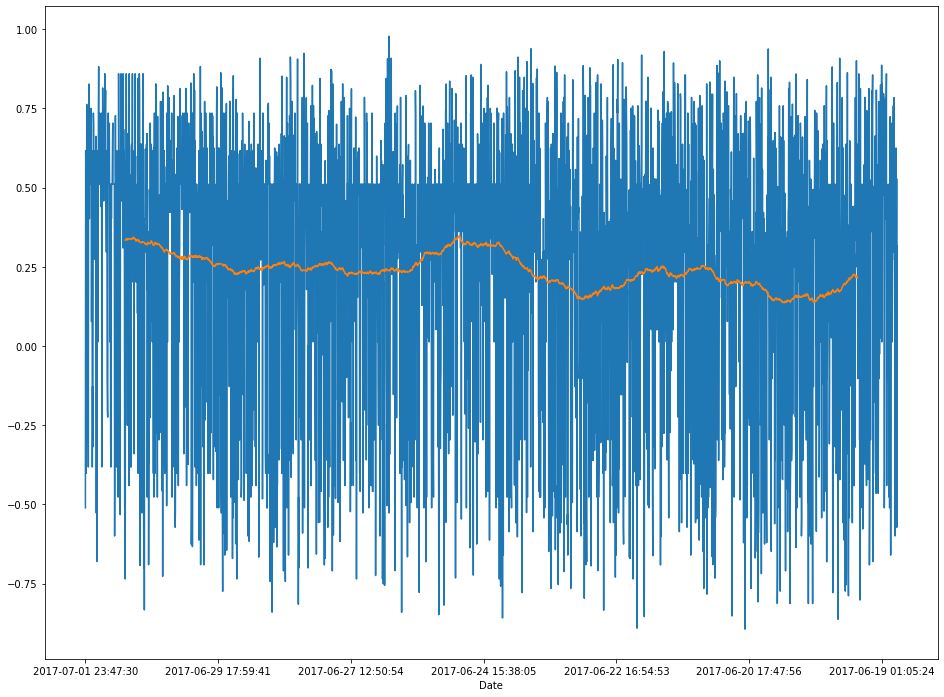

In [377]:
plt.rcParams["figure.figsize"] = (16, 12)
S.set_index('Date').Compound.plot()
S.set_index('Date').Compound.rolling(300, center=True).mean().plot()
S1 = S.set_index('Date')

Plot the scatter plot for the Compound over time

In [378]:
Sc = S.Compound

In [379]:
Sc[Sc!=0].median()

0.3818

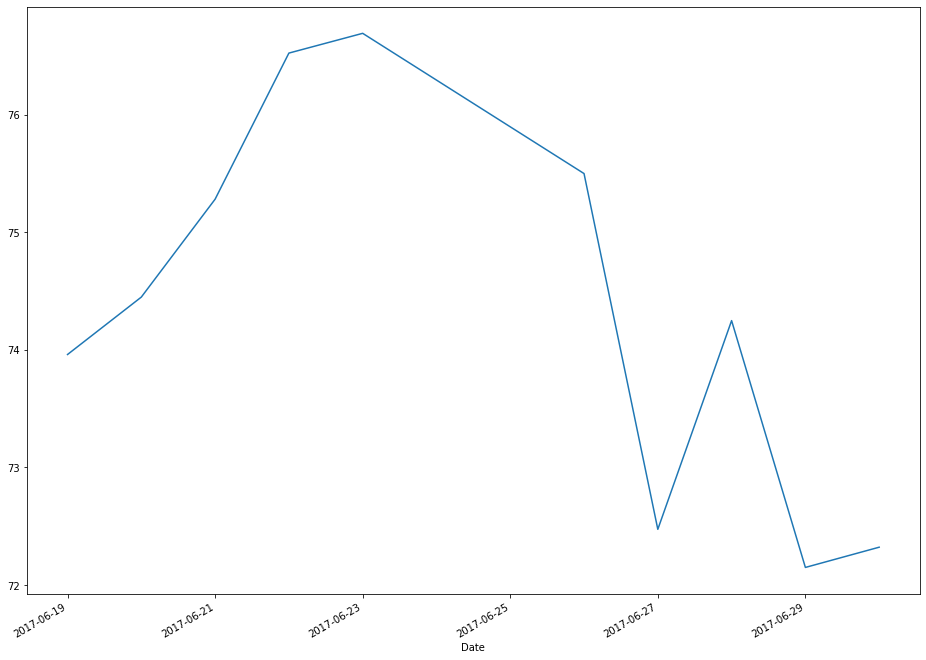

In [380]:
if company == 'AAPL':
    apple_stock_dates = pd.to_datetime(AAPL_stock.Date)
    apple_stock_prices = pd.Series([float(s[2:]) for s in AAPL_stock[' Close/Last']], index=apple_stock_dates)

    TA1 = apple_stock_prices[day1<apple_stock_prices.index]
    TA2 = TA1[TA1.index<date2]
    TA2.plot()

if company == 'TSLA':
    tesla_stock_dates = pd.to_datetime(TSLA_stock.Date)
    tesla_stock_prices = pd.Series([float(s[2:]) for s in TSLA_stock[' Close/Last']], index=tesla_stock_dates)

    TA1 = tesla_stock_prices[day1<tesla_stock_prices.index]
    TA2 = TA1[TA1.index<date2]
    TA2.plot()

if company == 'AMZN':
    amazon_stock_dates = pd.to_datetime(AMZN_stock.Date)
    amazon_stock_prices = pd.Series([float(s[2:]) for s in AMZN_stock[' Close/Last']], index=amazon_stock_dates)

    TA1 = amazon_stock_prices[day1<amazon_stock_prices.index]
    TA2 = TA1[TA1.index<date2]
    TA2.plot()
              
if company == 'GOOGL':
    google_stock_dates = pd.to_datetime(GOOGL_stock.Date)
    google_stock_prices = pd.Series([float(s[2:]) for s in GOOGL_stock[' Close/Last']], index=google_stock_dates)

    TA1 = google_stock_prices[day1<google_stock_prices.index]
    TA2 = TA1[TA1.index<date2]
    TA2.plot()
    

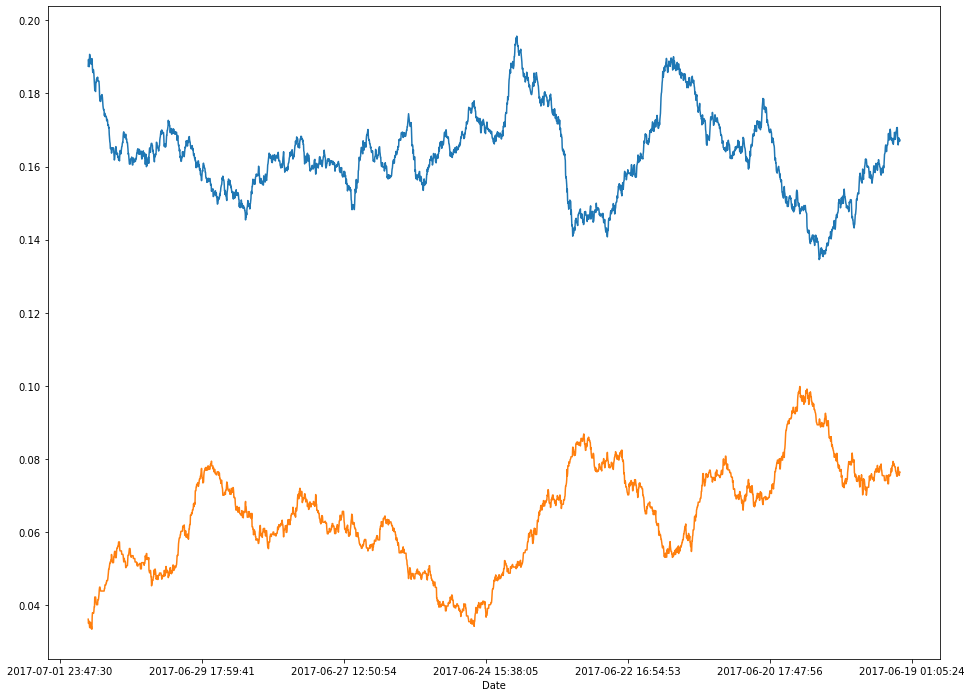

In [383]:
S1.Positive.rolling(200, center=True).mean().plot()
S1.Negative.rolling(200, center=True).mean().plot()
#S1.Compound.rolling(10000, center=True).mean().plot()

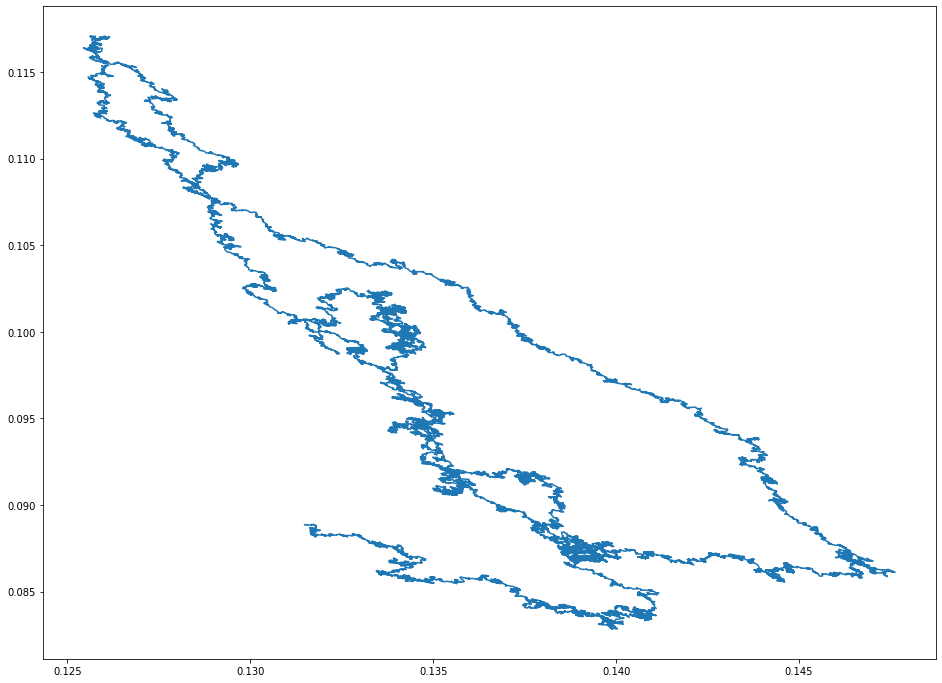

In [371]:
plt.plot(S1.Positive.rolling(5000, center=True).mean(), S1.Negative.rolling(5000, center=True).mean())